<a href="https://colab.research.google.com/github/Basu8971/Materraproject/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-68-e0f80af08ee2>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DayOfYear'] = filtered_data['Date'].dt.dayofyear
<ipython-input-68-e0f80af08ee2>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['RollingSum2'] = location_data['precipitation'].rolling(window=2).sum()
<ipython-input-68-e0f80af08ee2>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

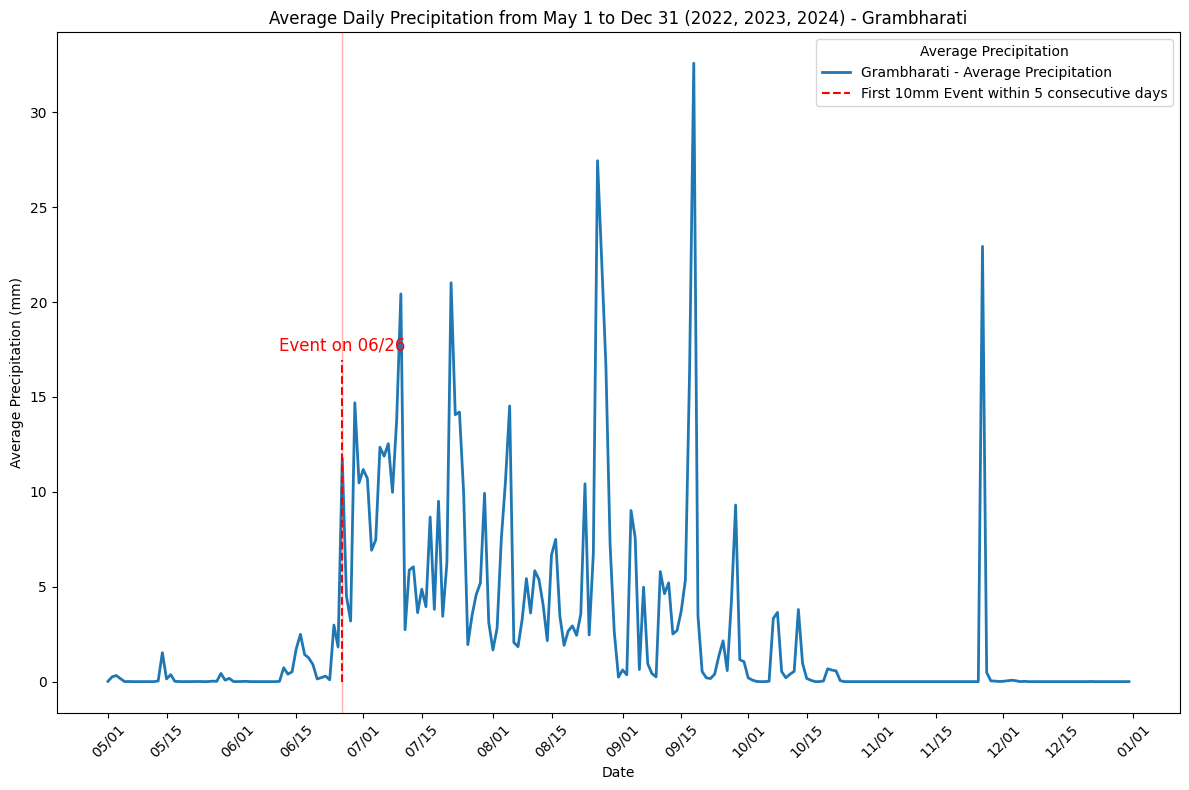

<ipython-input-68-e0f80af08ee2>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['RollingSum2'] = location_data['precipitation'].rolling(window=2).sum()
<ipython-input-68-e0f80af08ee2>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['RollingSum3'] = location_data['precipitation'].rolling(window=3).sum()
<ipython-input-68-e0f80af08ee2>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

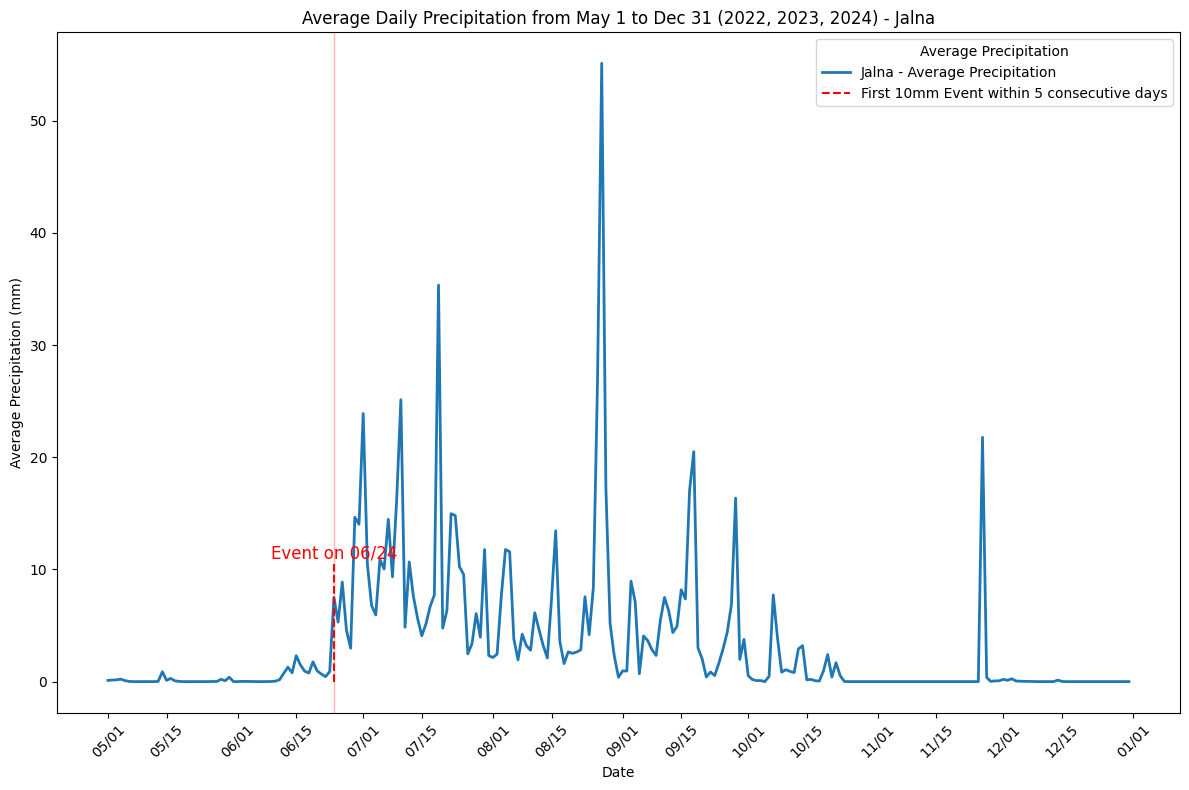

<ipython-input-68-e0f80af08ee2>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['RollingSum2'] = location_data['precipitation'].rolling(window=2).sum()
<ipython-input-68-e0f80af08ee2>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['RollingSum3'] = location_data['precipitation'].rolling(window=3).sum()
<ipython-input-68-e0f80af08ee2>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

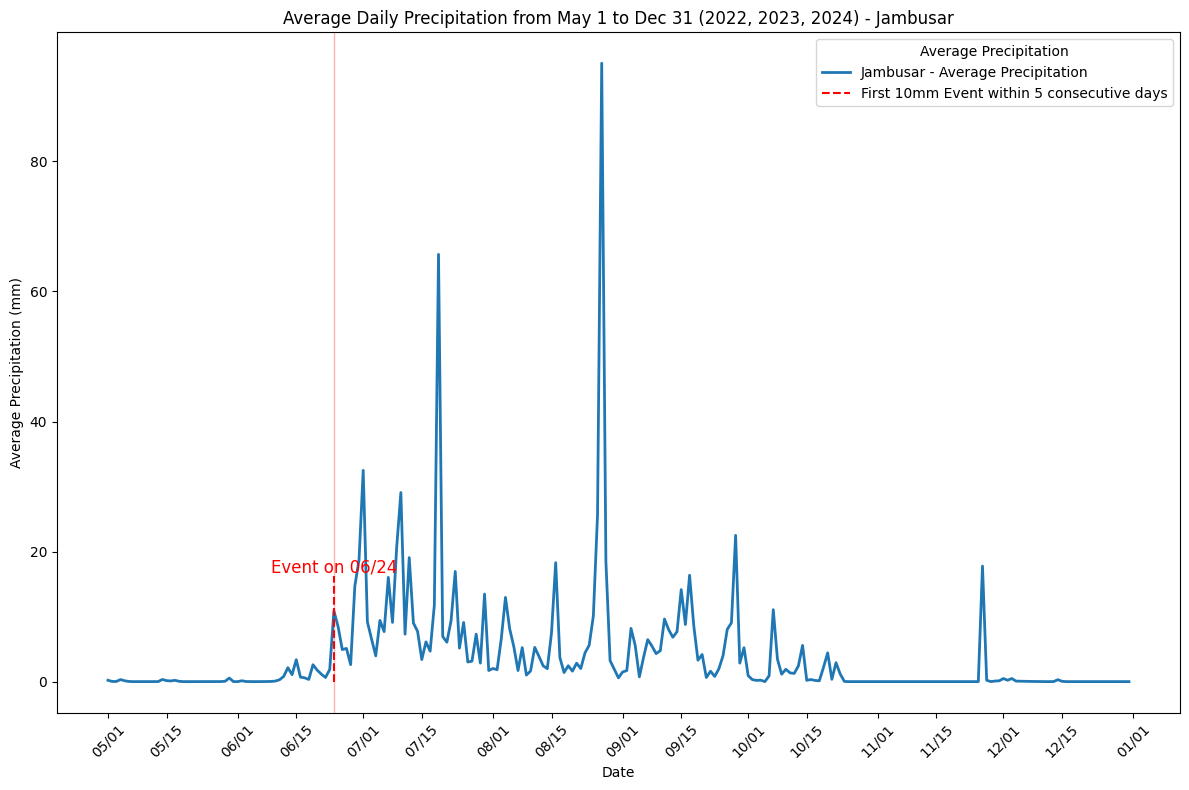

In [68]:
# Step 1: Install necessary libraries (if not already installed)
!pip install --upgrade gspread google-auth pandas matplotlib seaborn

# Step 2: Authenticate with Google using google-auth
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Authenticate the Google account
auth.authenticate_user()

# Use google-auth to get credentials and authorize gspread
creds, _ = default()
gc = gspread.authorize(creds)

# Step 3: Access Google Sheets using URLs
sheet_1_url = 'https://docs.google.com/spreadsheets/d/1306_u0hDxwOzAnAfghxXoam2lh6Pj10VIh8jBWU6ppU/edit?gid=1526811364#gid=1526811364'

# Open the Google Sheet using gspread
sheet_1 = gc.open_by_url(sheet_1_url)

# Load the data from the sheet into DataFrame
data_1 = pd.DataFrame(sheet_1.sheet1.get_all_records())  # Precipitation data

# Step 4: Clean and process the data (strip extra spaces)
data_1.columns = data_1.columns.str.strip()

# Step 5: Convert 'Date' to datetime format
data_1['Date'] = pd.to_datetime(data_1['Date'], errors='coerce')

# Step 6: Filter data for the date range (May 1 to Dec 31 for 2022, 2023, and 2024)
filtered_data = data_1[(data_1['Date'].dt.year.isin([2022, 2023, 2024])) &
                       (data_1['Date'].dt.month >= 5) &
                       (data_1['Date'].dt.month <= 12)]

# Step 7: Extract Day of Year from 'Date' for daily plots (DOY 1 to 365/366)
filtered_data['DayOfYear'] = filtered_data['Date'].dt.dayofyear

# Step 8: Group by Location and DayOfYear, and calculate the average precipitation for each location across all years
location_groups = filtered_data.groupby(['Location', 'DayOfYear'])['precipitation'].mean().reset_index()

# Step 9: Convert DayOfYear to actual dates
location_groups['Date'] = pd.to_datetime('2022-01-01') + pd.to_timedelta(location_groups['DayOfYear'] - 1, unit='D')

# Step 10: Create separate plots for each location
locations = location_groups['Location'].unique()

for location in locations:
    # Filter data for each location
    location_data = location_groups[location_groups['Location'] == location]

    # Calculate the 2, 3, 4, and 5-day rolling sum of precipitation (cumulative rainfall over consecutive days)
    location_data['RollingSum2'] = location_data['precipitation'].rolling(window=2).sum()
    location_data['RollingSum3'] = location_data['precipitation'].rolling(window=3).sum()
    location_data['RollingSum4'] = location_data['precipitation'].rolling(window=4).sum()
    location_data['RollingSum5'] = location_data['precipitation'].rolling(window=5).sum()

    # Find the first event where the cumulative rainfall over 2, 3, 4, or 5 days exceeds 10mm
    event_row = location_data[
        (location_data['RollingSum2'] > 10) |
        (location_data['RollingSum3'] > 10) |
        (location_data['RollingSum4'] > 10) |
        (location_data['RollingSum5'] > 10)
    ].iloc[0] if not location_data.empty else None

    # Plot the average precipitation for this location
    plt.figure(figsize=(12, 8))
    plt.plot(location_data['Date'], location_data['precipitation'], label=f'{location} - Average Precipitation', linewidth=2)

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('Average Precipitation (mm)')
    plt.title(f'Average Daily Precipitation from May 1 to Dec 31 (2022, 2023, 2024) - {location}')

    # Format the x-axis to display only Month/Day (e.g., 05/01, 05/16)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

    # Set x-axis limits and date intervals (e.g., every 15 days)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=(1, 15)))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # If an event exists, highlight the area and annotate the date
    if event_row is not None:
        event_date = event_row['Date']
        event_precip = event_row['RollingSum5']

        # Add a shaded area to highlight the event
        plt.axvspan(event_date, event_date, color='red', alpha=0.3)

        # Annotate the event date on the plot
        plt.text(event_date, event_precip + 0.5, f'Event on {event_date.strftime("%m/%d")}', color='red', fontsize=12, ha='center')

        # Plot the first event as a new line (red dashed line)
        plt.plot([event_date, event_date], [0, event_precip], color='red', linestyle='--', label=f'First 10mm Event within 5 consecutive days')

    # Add a legend
    plt.legend(title='Average Precipitation')

    # Display the plot
    plt.tight_layout()
    plt.show()
